In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

## Load Data

In [17]:
df = pd.read_csv('british-airways-reviews.csv')

In [18]:
df.head()

,text,aircraft,traveller_type,seat_type,flown_date,seat_comortable,cabin_staff_service,food,ground_service,value_for_money,recommended,rate
0,If you can’t fly First Class don’t fly British...,Boeing 777,Couple Leisure,Economy Class,July 2024,1.0,1.0,1.0,1.0,1,no,1
1,Singapore to Heathrow. Business class on an A3...,A380-800,Family Leisure,Business Class,July 2024,3.0,2.0,3.0,5.0,2,yes,1
2,I reported my damaged/ruined suitcase 5 weeks ...,NaN,Solo Leisure,Economy Class,June 2024,3.0,4.0,4.0,2.0,3,no,1
3,"On March 1st, I flew from Berlin to São Paulo ...",NaN,Business,Economy Class,March 2024,3.0,4.0,3.0,1.0,2,no,1
4,The WORST customer experience! British Airways...,NaN,Couple Leisure,Economy Class,September 2023,1.0,1.0,NaN,1.0,1,no,1


In [4]:
df.shape

(2022, 12)

## Data Cleaning 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2022 entries, 0 to 2021
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   text                 2022 non-null   object 
 1   aircraft             1226 non-null   object 
 2   traveller_type       2019 non-null   object 
 3   seat_type            2022 non-null   object 
 4   flown_date           2022 non-null   object 
 5   seat_comortable      1912 non-null   float64
 6   cabin_staff_service  1899 non-null   float64
 7   food                 1658 non-null   float64
 8   ground_service       1955 non-null   float64
 9   value_for_money      2022 non-null   int64  
 10  recommended          2022 non-null   object 
 11  rate                 2022 non-null   int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 189.7+ KB


### Check Missing Values

In [5]:
df.isnull().sum()

text                     0
aircraft               796
traveller_type           3
seat_type                0
flown_date               0
seat_comortable        110
cabin_staff_service    123
food                   364
ground_service          67
value_for_money          0
recommended              0
rate                     0
dtype: int64

- aircraft -> wil fill it by most frequent value
- seat_comortable -> wil fill it by most median value
- cabin_staff_service -> wil fill it by most median value
- food -> wil fill it by most median value
- ground_service -> wil fill it by most median value                     

In [20]:
# fill missing values if there is 
for column in df.columns:
    if df[column].isnull().any(): # check if column has a missing values 
        if df[column].dtype == 'object':
            # fill with most frequent value using mode for object datatype 
            df[column].fillna(df[column].mode()[0], inplace=True)
        else:
            # fill with median value using mode for other datatypes
             df[column].fillna(df[column].median(), inplace=True)

### Check Data Types

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2022 entries, 0 to 2021
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   text                 2022 non-null   object 
 1   aircraft             2022 non-null   object 
 2   traveller_type       2022 non-null   object 
 3   seat_type            2022 non-null   object 
 4   flown_date           2022 non-null   object 
 5   seat_comortable      2022 non-null   float64
 6   cabin_staff_service  2022 non-null   float64
 7   food                 2022 non-null   float64
 8   ground_service       2022 non-null   float64
 9   value_for_money      2022 non-null   int64  
 10  recommended          2022 non-null   object 
 11  rate                 2022 non-null   int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 189.7+ KB


- date ->  must change to datetype
- seat_comortable -> must change to int
- cabin_staff_service -> must change to int
- food -> must change to int
- ground_service -> must change to int

In [22]:
# change flown date type to date
df['flown_date'] = pd.to_datetime(df['flown_date'])
# df['flown_date'] = df['flown_date'].dt.strftime('%B %Y')

C:\Users\Eng.M\AppData\Local\Temp\ipykernel_12004\2900144648.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['flown_date'] = pd.to_datetime(df['flown_date'])


In [23]:
# convert seat_comortable to integer 
df['seat_comortable'] = df['seat_comortable'].astype(int)

In [26]:
# convert cabin_staff_service to integer 
df['cabin_staff_service'] = df['cabin_staff_service'].astype(int)

In [27]:
# convert cabin_staff_service to integer 
df['food'] = df['food'].astype(int)

In [28]:
# convert cabin_staff_service to integer 
df['ground_service'] = df['ground_service'].astype(int)

In [29]:
df.dtypes

text                           object
aircraft                       object
traveller_type                 object
seat_type                      object
flown_date             datetime64[ns]
seat_comortable                 int32
cabin_staff_service             int32
food                            int32
ground_service                  int32
value_for_money                 int64
recommended                    object
rate                            int64
dtype: object

### Check Duplications

In [30]:
df.duplicated().sum()

0

## Data Exploration

### Summary Statistics

In [31]:
# summary statistics for numeric columes
df.describe(include='number')

,seat_comortable,cabin_staff_service,food,ground_service,value_for_money,rate
count,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000
mean,2.700297,3.046983,2.402077,2.685460,2.387735,4.086548
std,1.311914,1.467871,1.326865,1.453885,1.430566,3.126545
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000
75%,4.000000,4.000000,3.000000,4.000000,4.000000,7.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000


In [34]:
# summary statistics for object columes
df.describe(include='object')

,text,aircraft,traveller_type,seat_type,recommended
count,2022,2022,2022,2022,2022
unique,2022,144,4,4,2
top,If you can’t fly First Class don’t fly British...,A320,Couple Leisure,Economy Class,no
freq,1,1056,672,1129,1394


### Correlation analysis

In [39]:
# change recommended column values t 0 and 1
df['recommended'] = df['recommended'].replace({'yes': 1, 'no': 0})

In [40]:
corr = df.corr(numeric_only=True)
corr

,seat_comortable,cabin_staff_service,food,ground_service,value_for_money,recommended,rate
seat_comortable,1.000000,0.598290,0.580627,0.549546,0.655414,0.621924,0.695620
cabin_staff_service,0.598290,1.000000,0.680042,0.515385,0.642377,0.624511,0.690319
food,0.580627,0.680042,1.000000,0.480085,0.664922,0.665902,0.712017
ground_service,0.549546,0.515385,0.480085,1.000000,0.656986,0.623192,0.716037
value_for_money,0.655414,0.642377,0.664922,0.656986,1.000000,0.799227,0.872531
recommended,0.621924,0.624511,0.665902,0.623192,0.799227,1.000000,0.861190
rate,0.695620,0.690319,0.712017,0.716037,0.872531,0.861190,1.000000


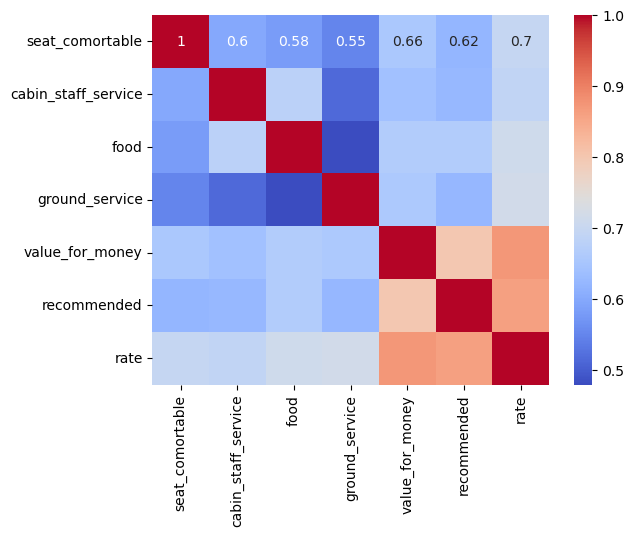

In [41]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

## Data Visualization

### Data Distributions

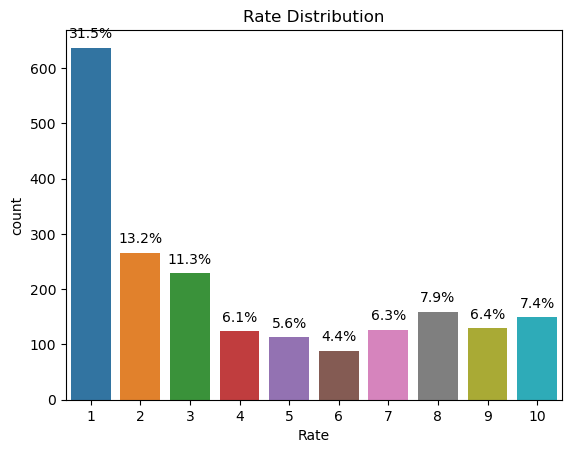

In [50]:
# rate distribution
ax = sns.countplot(data=df, x='rate')
plt.title('Rate Distribution')
plt.xlabel('Rate')

# Add percentages on top of the bars
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / 2022)
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Show the plot
plt.show()

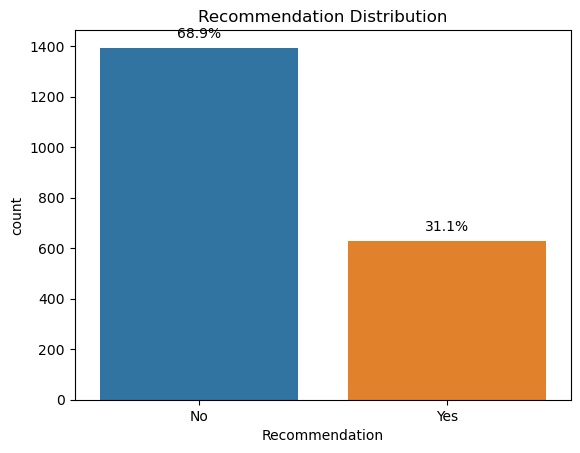

In [52]:
# Recommended distribution
ax = sns.countplot(data=df, x='recommended')
plt.title('Recommendation Distribution')
plt.xlabel('Recommendation')

# Add percentages on top of the bars
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / 2022)
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

ax.set_xticklabels(['No', 'Yes'])
# Show the plot
plt.show()

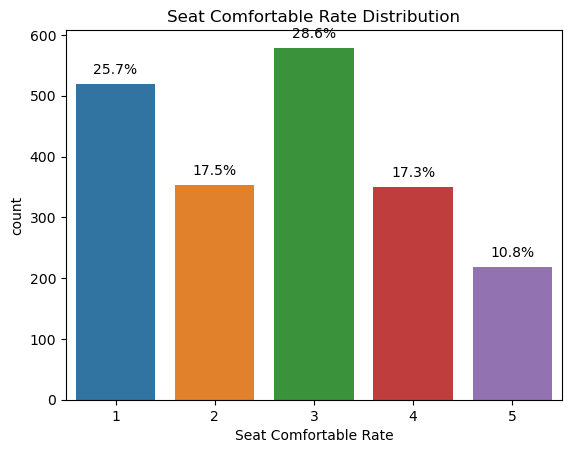

In [63]:
# Seat Comfortable rate distribution
ax = sns.countplot(data=df, x='seat_comortable')
plt.title('Seat Comfortable Rate Distribution')
plt.xlabel('Seat Comfortable Rate')

# Add percentages on top of the bars
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / 2022)
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Show the plot
plt.show()

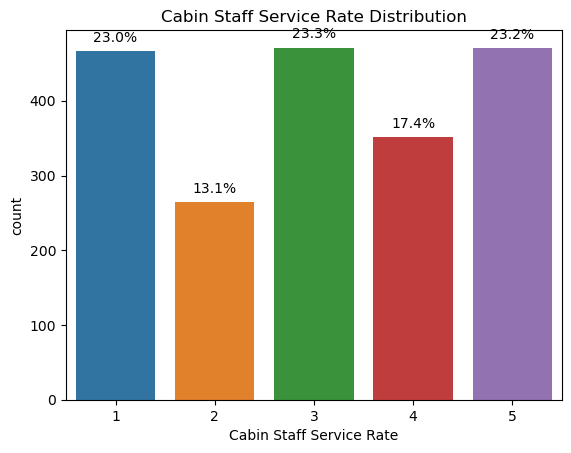

In [64]:
# Cabin Staff Service distribution
ax = sns.countplot(data=df, x='cabin_staff_service')
plt.title('Cabin Staff Service Rate Distribution')
plt.xlabel('Cabin Staff Service Rate')

# Add percentages on top of the bars
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / 2022)
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Show the plot
plt.show()

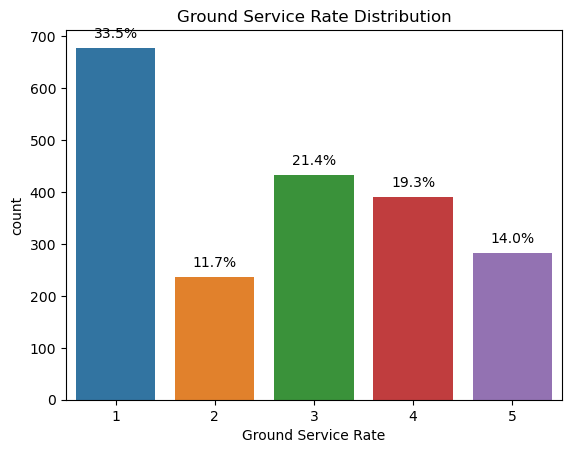

In [65]:
# Ground Service distribution
ax = sns.countplot(data=df, x='ground_service')
plt.title('Ground Service Rate Distribution')
plt.xlabel('Ground Service Rate')

# Add percentages on top of the bars
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / 2022)
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Show the plot
plt.show()

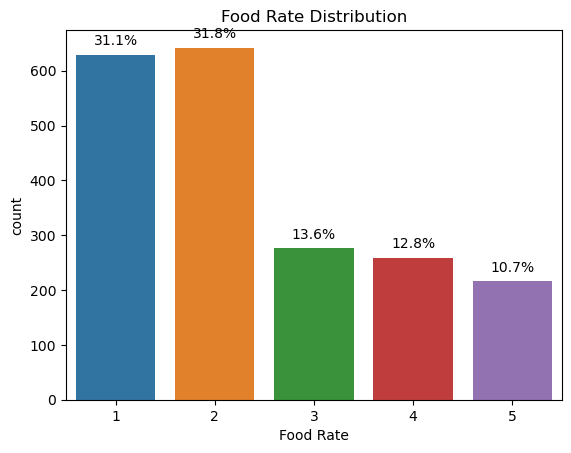

In [62]:
# Food distribution
ax = sns.countplot(data=df, x='food')
plt.title('Food Rate Distribution')
plt.xlabel('Food Rate')

# Add percentages on top of the bars
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / 2022)
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Show the plot
plt.show()

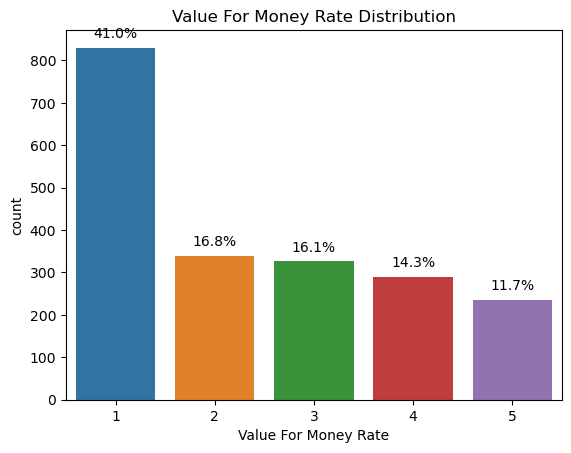

In [66]:
# Value For Money distribution
ax = sns.countplot(data=df, x='value_for_money')
plt.title('Value For Money Rate Distribution')
plt.xlabel('Value For Money Rate')

# Add percentages on top of the bars
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / 2022)
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Show the plot
plt.show()

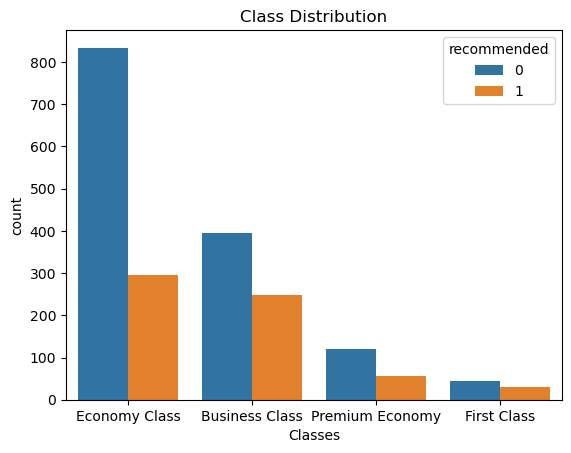

In [56]:
# Classes Distribution according to recommendation
sns.countplot(x=df['seat_type'].astype(str), hue=df['recommended'].astype(str))
plt.title('Class Distribution According to Recommendation')
plt.xlabel('Classes')

# Show the plot
plt.show()

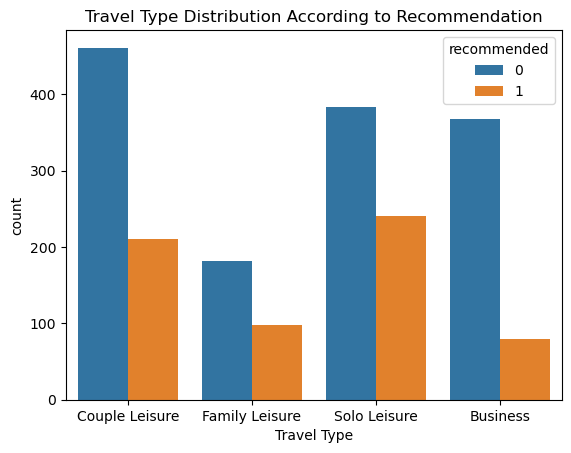

In [68]:
# Travel Type Distribution according to recommendation
sns.countplot(x=df['traveller_type'].astype(str), hue=df['recommended'].astype(str))
plt.title('Travel Type Distribution According to Recommendation')
plt.xlabel('Travel Type')

# Show the plot
plt.show()

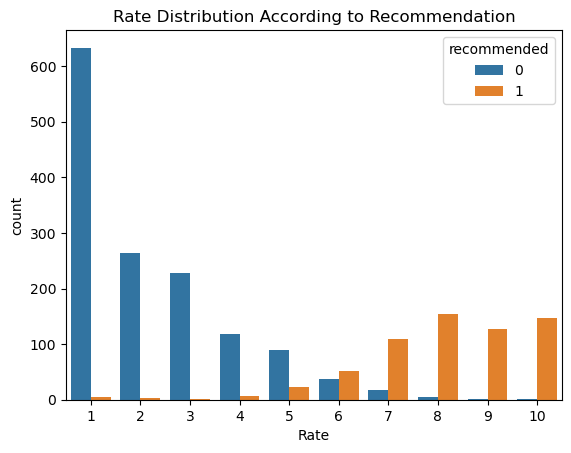

In [84]:
# Rate according to recommendation
sns.countplot(x=df['rate'], hue=df['recommended'].astype(str))
plt.title('Rate Distribution According to Recommendation')
plt.xlabel('Rate')

# Show the plot
plt.show()

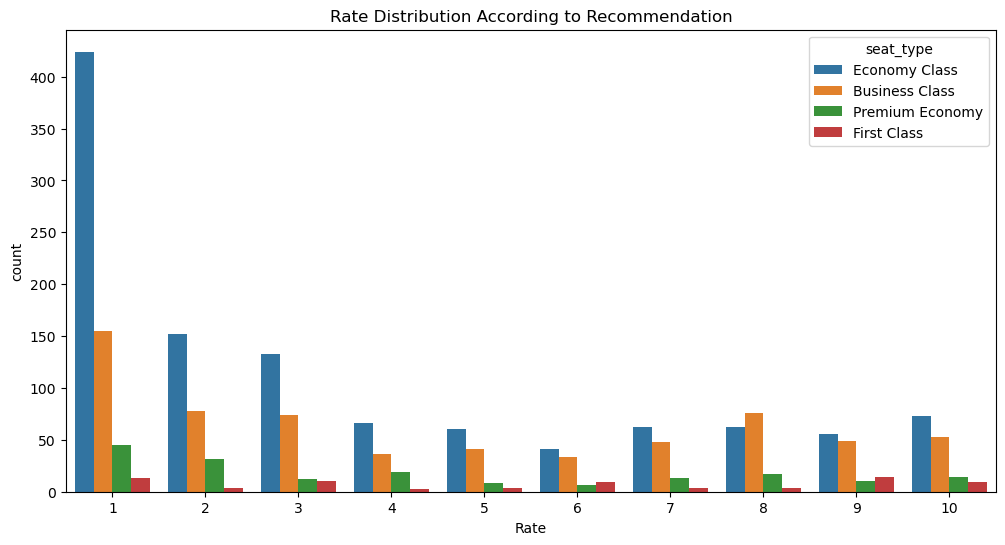

In [88]:
# Rate according to recommendation
plt.figure(figsize=(12, 6))
sns.countplot(x=df['rate'], hue=df['seat_type'].astype(str))
plt.title('Rate Distribution According to Recommendation')
plt.xlabel('Rate')

# Show the plot
plt.show()

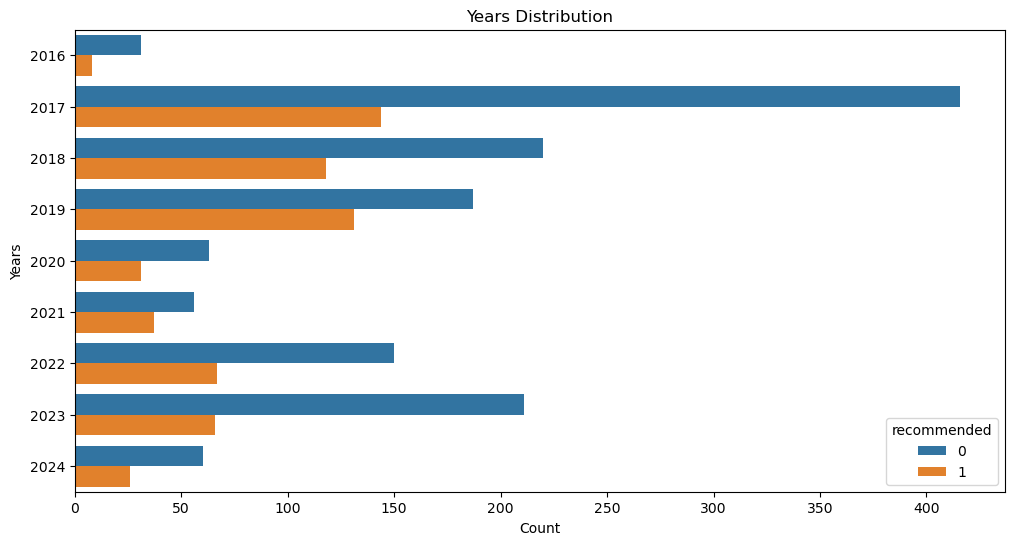

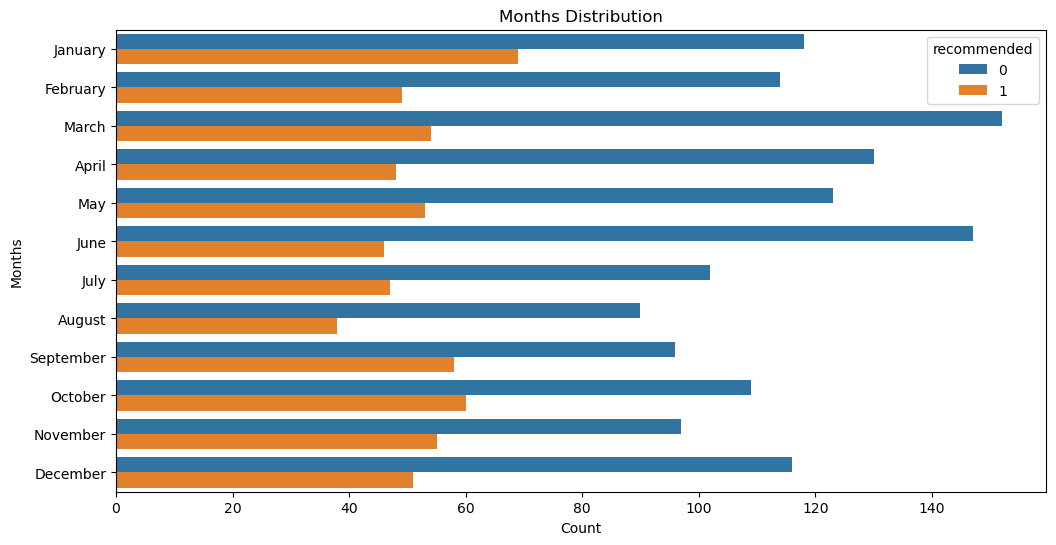

In [71]:
# Date distribution
# Extract year and month from the date column
df['year'] = df['flown_date'].dt.year
df['month'] = df['flown_date'].dt.strftime('%B')  # Full month name

# Create the horizontal count plot for years
plt.figure(figsize=(12, 6))
ax_year = sns.countplot(data=df, y='year', hue=df['recommended'].astype(str))
plt.title('Years Distribution')
plt.xlabel('Count')
plt.ylabel('Years')

# Create the horizontal count plot for months
plt.figure(figsize=(12, 6))
ax_month = sns.countplot(data=df, y='month', hue=df['recommended'].astype(str), order=pd.date_range('2023-01-01', '2023-12-31', freq='MS').strftime('%B'))
plt.title('Months Distribution')
plt.xlabel('Count')
plt.ylabel('Month')

# Show the plots
plt.show()

### Grouping

In [74]:
df.groupby('seat_type')['recommended'].value_counts(normalize=True)

seat_type        recommended
Business Class   0              0.615863
                 1              0.384137
Economy Class    0              0.738707
                 1              0.261293
First Class      0              0.594595
                 1              0.405405
Premium Economy  0              0.681818
                 1              0.318182
Name: proportion, dtype: float64

In [75]:
df.groupby('rate')['recommended'].value_counts(normalize=True)

rate  recommended
1     0              0.993721
      1              0.006279
2     0              0.988722
      1              0.011278
3     0              0.991266
      1              0.008734
4     0              0.951613
      1              0.048387
5     0              0.796460
      1              0.203540
6     1              0.573034
      0              0.426966
7     1              0.866142
      0              0.133858
8     1              0.968553
      0              0.031447
9     1              0.992248
      0              0.007752
10    1              0.986577
      0              0.013423
Name: proportion, dtype: float64

In [85]:
df.groupby('seat_type')['rate'].value_counts(normalize=True)

seat_type        rate
Business Class   1       0.241058
                 2       0.121306
                 8       0.118196
                 3       0.115086
                 10      0.082426
                 9       0.076205
                 7       0.074650
                 5       0.063764
                 4       0.055988
                 6       0.051322
Economy Class    1       0.375554
                 2       0.134632
                 3       0.117803
                 10      0.064659
                 4       0.058459
                 7       0.054916
                 8       0.054916
                 5       0.053144
                 9       0.049601
                 6       0.036315
First Class      9       0.189189
                 1       0.175676
                 3       0.135135
                 10      0.121622
                 6       0.121622
                 8       0.054054
                 7       0.054054
                 2       0.054054
                 5       0

### Text Visualization

In [94]:
df['text'][4]

"The WORST customer experience! British Airways (BA) is effectively robbing people! They are not here to help and show no compassion. My partner and I fell ill and had a doctor’s note stating we couldn't fly. BA said they'd hold our flight amount as a voucher valid for a year. Fair enough. Caveat to this (which was not stated to us): you must call them and it is not usable on holiday packages. However, using this voucher was a nightmare. We can't use it for both our tickets because the original was long-haul, and they refuse to refund half the amount. BA's customer service was awful and rude, effectively stealing £400 from us. This policy must stop. We feel held hostage with no solution."

In [95]:
# Text classification positive or negative
df['ploarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment[0])

In [97]:
df['label'] = df['ploarity'].apply(lambda x: 'Positive' if x>= .3 else 'Negative')

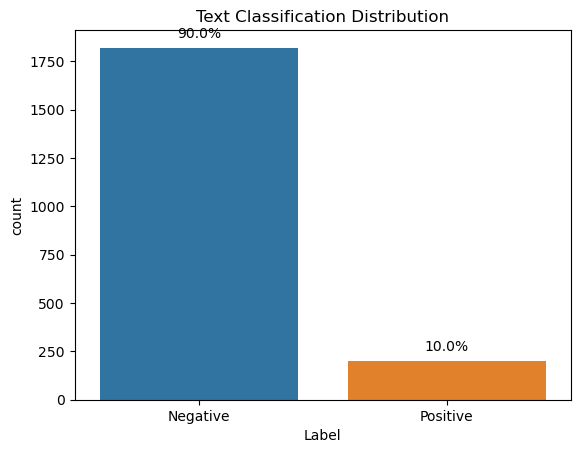

In [101]:
ax = sns.countplot(x=df['label'])
plt.title('Text Classification Distribution')

plt.xlabel('Label')

# Add percentages on top of the bars
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / 2022)
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Show the plot
plt.show()

In [102]:
# create paostive and negative corpus
pos_corpus = ' '.join(df[df['label'] == 'Positive']['text'])
neg_corpus = ' '.join(df[df['label'] == 'Negative']['text'])

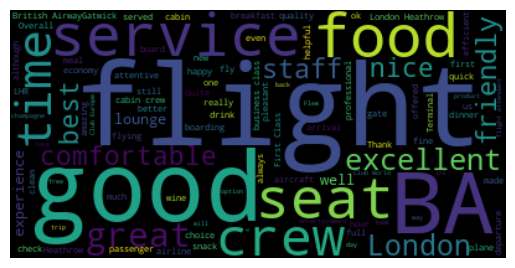

In [105]:
# visualize positive text
pos_wordcloud = WordCloud().generate(pos_corpus)
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

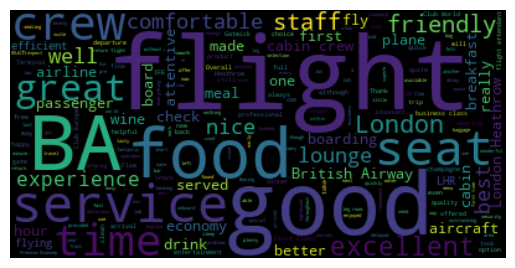

In [106]:
# visualize Negative text
neg_wordcloud = WordCloud().generate(pos_corpus)
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()